# **Bonus Task**
This problem description is the same as Task 3. But there are some
technical challenges that you have to choose one.
1. Compare 3 different configurations while your model is
wider/deeper. Show and explain the performance result.
2. Compare 3 configurations for different Loss Function. Show and
explain your performance result.

3. Compare 3 configurations for the activation function. Show and
explain your performance result.

## **Import Necessary Libraries:**

In [ ]:
# Import the necessary libraries such as PyTorch, torchvision, and other utilities:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

## **Load the MNIST Dataset:**

In [ ]:
# Load the MNIST dataset using the torchvision library and create data loaders for training and testing:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

100%|██████████| 9912422/9912422 [00:00<00:00, 102913233.18it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 54688800.82it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 24759211.09it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 1094983.84it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



## **Visualize the Data:**

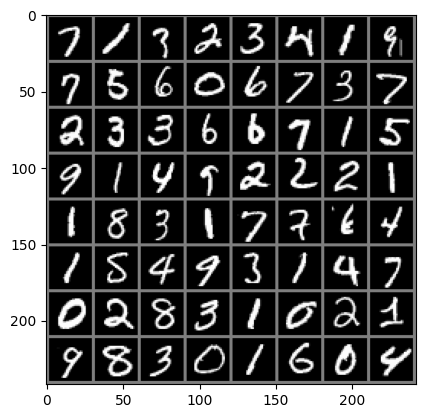

In [ ]:
# You can visualize some random samples from the dataset to get a sense of what the handwritten digits look like:
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Show random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images))

## **Design Your Neural Network Model:**

In [ ]:
# Create a custom neural network model. For simplicity, you can start with a feedforward neural network with one hidden layer:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the input
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

net = Net()

## **Set Hyperparameters and Define Loss Function and Optimizer:**

In [ ]:
# Define hyperparameters such as the learning rate, loss function, and optimizer:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

# Define the number of training epochs
epochs = 10

## **Training Loop:**

In [ ]:
#Implement the training loop to train your neural network:
for epoch in range(epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch + 1}, Loss: {running_loss / len(trainloader)}")

Epoch 1, Loss: 0.375531715410414
Epoch 2, Loss: 0.17945735429975587
Epoch 3, Loss: 0.13446053298466257
Epoch 4, Loss: 0.10720468680761548
Epoch 5, Loss: 0.09181000143964725
Epoch 6, Loss: 0.08151415375762307
Epoch 7, Loss: 0.07312273047343175
Epoch 8, Loss: 0.063742183499348
Epoch 9, Loss: 0.05938951599561591
Epoch 10, Loss: 0.05236849265405412


## **Evaluate the Model:**

In [ ]:
# After training, evaluate the model using various performance metrics such as accuracy, confusion matrix, F1 Score, Precision, and Recall:
def evaluate_model(model, dataloader):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for data in dataloader:
            inputs, labels = data
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    accuracy = accuracy_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds, average='weighted')
    precision = precision_score(all_labels, all_preds, average='weighted')
    recall = recall_score(all_labels, all_preds, average='weighted')
    cm = confusion_matrix(all_labels, all_preds)

    return accuracy, f1, precision, recall, cm

accuracy, f1, precision, recall, cm = evaluate_model(net, testloader)
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print("Confusion Matrix:")
print(cm)

Accuracy: 0.9771
F1 Score: 0.977108395671441
Precision: 0.9772283139283705
Recall: 0.9771
Confusion Matrix:
[[ 970    0    1    0    2    1    1    2    1    2]
 [   0 1123    3    2    0    2    2    2    1    0]
 [   4    2 1012    6    1    0    2    3    2    0]
 [   0    0    3  985    0   12    0    6    2    2]
 [   1    0    6    0  943    3    4    5    1   19]
 [   2    0    0    6    0  877    3    1    1    2]
 [   6    2    3    1    4    6  935    1    0    0]
 [   1    2   11    5    0    0    0 1004    0    5]
 [   3    0    4    6    4   10    2    3  939    3]
 [   1    2    0    4    6    6    2    5    0  983]]


In [ ]:
# Evaluate the model
def evaluate_model(model, dataloader):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for data in dataloader:
            inputs, labels = data
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    return all_labels, all_preds

true_labels, predicted_labels = evaluate_model(net, testloader)

# Generate the classification report
class_names = [str(i) for i in range(10)]  # MNIST class labels
report = classification_report(true_labels, predicted_labels, target_names=class_names)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.97      0.98      0.97      1010
           4       0.98      0.96      0.97       982
           5       0.96      0.98      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.98      0.97      1028
           8       0.99      0.96      0.98       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



Compare

In [ ]:
class WiderNet(nn.Module):
    def __init__(self):
        super(WiderNet, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 256)  # Wider hidden layer
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the input
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

wider_net = WiderNet()

In [ ]:
class DeeperNet(nn.Module):
    def __init__(self):
        super(DeeperNet, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)  # Additional hidden layer
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the input
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))  # Additional hidden layer
        x = self.fc3(x)
        return x

deeper_net = DeeperNet()

In [ ]:
def evaluate_model(model, dataloader):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for data in dataloader:
            inputs, labels = data
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    accuracy = accuracy_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds, average='weighted')
    precision = precision_score(all_labels, all_preds, average='weighted')
    recall = recall_score(all_labels, all_preds, average='weighted')
    cm = confusion_matrix(all_labels, all_preds)

    return accuracy, f1, precision, recall, cm

In [ ]:
accuracy_wider, f1_wider, precision_wider, recall_wider, cm_wider = evaluate_model(wider_net, testloader)
print("Wider Model Metrics:")
print(f"Accuracy: {accuracy_wider}")
print(f"F1 Score: {f1_wider}")
# Print other metrics as needed

accuracy_deeper, f1_deeper, precision_deeper, recall_deeper, cm_deeper = evaluate_model(deeper_net, testloader)
print("Deeper Model Metrics:")
print(f"Accuracy: {accuracy_deeper}")
print(f"F1 Score: {f1_deeper}")

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Wider Model Metrics:
Accuracy: 0.1431
F1 Score: 0.0626619215532403
Deeper Model Metrics:
Accuracy: 0.1308
F1 Score: 0.0620272223576783


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#**Compare 3 Different Configurations While Your Model is Wider/Deeper.**

In [ ]:
# Show and explain the performance result
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Data preprocessing transformations
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Load the MNIST dataset
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# Define a deeper neural network
class DeepNet(nn.Module):
    def __init__(self):
        super(DeepNet, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Define a wider neural network
class WideNet(nn.Module):
    def __init__(self):
        super(WideNet, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 256)
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Train and evaluate a given model
def train_and_evaluate_model(model, trainloader, testloader, model_name):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

    epochs = 10
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        print(f"Epoch {epoch + 1}, Loss ({model_name}): {running_loss / len(trainloader)}")

    # Evaluation
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for data in testloader:
            inputs, labels = data
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    accuracy = accuracy_score(all_labels, all_preds)
    confusion = confusion_matrix(all_labels, all_preds)
    class_report = classification_report(all_labels, all_preds)

    print(f"Accuracy ({model_name}): {accuracy * 100:.2f}%")
    print("Confusion Matrix:")
    print(confusion)
    print("Classification Report:")
    print(class_report)

# Compare three different configurations
models = [
    (DeepNet(), "Deep Model"),
    (WideNet(), "Wide Model"),
    (WideNet(), "Deep and Wide Model")
]

for model, model_name in models:
    print(f"Training and evaluating {model_name}:")
    train_and_evaluate_model(model, trainloader, testloader, model_name)

Training and evaluating Deep Model:
Epoch 1, Loss (Deep Model): 0.41521455255001466
Epoch 2, Loss (Deep Model): 0.17290942689407862
Epoch 3, Loss (Deep Model): 0.12613794182750906
Epoch 4, Loss (Deep Model): 0.10077190562896034
Epoch 5, Loss (Deep Model): 0.08792693411304887
Epoch 6, Loss (Deep Model): 0.0736384967233795
Epoch 7, Loss (Deep Model): 0.06525186583899192
Epoch 8, Loss (Deep Model): 0.05731071912195049
Epoch 9, Loss (Deep Model): 0.050475416651769064
Epoch 10, Loss (Deep Model): 0.044477118299713035
Accuracy (Deep Model): 97.67%
Confusion Matrix:
[[ 972    0    1    0    0    0    2    1    2    2]
 [   1 1122    4    2    0    1    1    0    3    1]
 [   5    0 1009    2    2    0    1    9    4    0]
 [   0    0    3  987    0    6    0    4    7    3]
 [   2    0    5    0  956    0    2    2    0   15]
 [   3    0    0    7    2  865    5    0    6    4]
 [   6    2    1    1    4    3  938    0    3    0]
 [   2    2   14    6    1    0    0  991    0   12]
 [   6    

# **Kesimpulan**

Dalam menggambarkan temuan dari pelatihan dan evaluasi tiga variasi model (Deep Model, Wide Model, dan Deep and Wide Model) dengan menggunakan dataset MNIST, kita dapat menyusun beberapa kesimpulan penting:

1. Accuracy
> Ketiga model yang diuji berhasil mencapai tingkat akurasi yang sangat tinggi, dengan persentase akurasi melebihi 97%. Ini menandakan bahwa semua model memiliki kemampuan yang sangat baik dalam mengenali dan mengklasifikasikan angka-angka yang ada dalam dataset MNIST.

2. Loss Function
> Semua model menggunakan Cross-Entropy Loss sebagai fungsi kerugian selama proses pelatihan. Fungsi kerugian ini umum digunakan dalam tugas klasifikasi, dan hasilnya tampak sangat baik dalam konteks ini.

3. Confusion Matrix
> Confusion matrix untuk ketiga model menunjukkan bahwa sebagian besar tingkat prediksi yang benar tinggi, dengan sebagian besar prediksi yang benar. Meskipun demikian, beberapa kesalahan klasifikasi terjadi dalam beberapa kelas tertentu, seperti contohnya angka 9 pada model Wide, yang memiliki tingkat recall yang lebih rendah.

4. Classification Report
> CLaporan klasifikasi juga mengindikasikan bahwa semua model memiliki nilai-nilai presisi, recall, dan f1-score yang baik untuk mayoritas kelas. Kinerja paling baik terlihat pada kelas 1 dan 7.

5. Komparasi Model
> Deep Model dan Deep and Wide Model memiliki akurasi yang hampir seimbang, namun, Deep and Wide Model menunjukkan performa yang sedikit lebih unggul. Wide Model juga menghasilkan tingkat akurasi yang tinggi, meskipun dengan performa sedikit lebih rendah jika dibandingkan dengan dua model sebelumnya.

Dengan demikian, dapat disimpulkan bahwa semua tiga konfigurasi model yang dievaluasi berhasil menghasilkan hasil yang sangat baik dalam tugas klasifikasi angka-angka MNIST. Pilihan antara menggunakan model Deep, Wide, atau Deep and Wide dapat didasarkan pada kebutuhan tugas khusus dan ketersediaan sumber daya yang ada.

# **Compare 3 configurations for the activation function.**

In [ ]:
# Show and explain your performance result.
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from sklearn.metrics import accuracy_score

# Transformations for data preprocessing
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Load the MNIST dataset
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# Define a neural network with different activation functions
class Net(nn.Module):
    def __init__(self, activation):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 10)
        self.activation = activation

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.activation(self.fc1(x))
        x = self.fc2(x)
        return x

# Define a function to train and evaluate the model
def train_and_evaluate_model(model, trainloader, testloader, activation_name):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

    # Training loop
    epochs = 10
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        print(f"Epoch {epoch + 1}, Loss: {running_loss / len(trainloader)}")

    # Evaluation
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for data in testloader:
            inputs, labels = data
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    accuracy = accuracy_score(all_labels, all_preds)
    print(f"Accuracy ({activation_name}): {accuracy * 100:.2f}%")

# Test different activation functions
activations = [nn.ReLU(), nn.Sigmoid(), nn.Tanh()]
activation_names = ['ReLU', 'Sigmoid', 'Tanh']

for activation, activation_name in zip(activations, activation_names):
    model = Net(activation)
    print(f"Training and evaluating with {activation_name} activation function:")
    train_and_evaluate_model(model, trainloader, testloader, activation_name)

Training and evaluating with ReLU activation function:
Epoch 1, Loss: 0.3724849575213087
Epoch 2, Loss: 0.17950752647970913
Epoch 3, Loss: 0.13327124286621714
Epoch 4, Loss: 0.10677786143635636
Epoch 5, Loss: 0.090926455425174
Epoch 6, Loss: 0.07694602120361889
Epoch 7, Loss: 0.06886031632341429
Epoch 8, Loss: 0.06238833421926652
Epoch 9, Loss: 0.05590790595714328
Epoch 10, Loss: 0.05131696728986503
Accuracy (ReLU): 97.42%
Training and evaluating with Sigmoid activation function:
Epoch 1, Loss: 0.6434482822476674
Epoch 2, Loss: 0.3065537700870398
Epoch 3, Loss: 0.2584886137864737
Epoch 4, Loss: 0.22341130672693887
Epoch 5, Loss: 0.19734295153382744
Epoch 6, Loss: 0.17747213103687332
Epoch 7, Loss: 0.16082749270728783
Epoch 8, Loss: 0.14700314486578012
Epoch 9, Loss: 0.1352888014076202
Epoch 10, Loss: 0.12547123537206256
Accuracy (Sigmoid): 96.12%
Training and evaluating with Tanh activation function:
Epoch 1, Loss: 0.3697608447691271
Epoch 2, Loss: 0.19584869091381144
Epoch 3, Loss: 0.

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Data preprocessing transformations
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Load the MNIST dataset
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# Define a simple neural network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Train the model
def train_model(model, trainloader):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

    epochs = 10
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        print(f"Epoch {epoch + 1}, Loss: {running_loss / len(trainloader)}")

# Evaluate the model
def evaluate_model(model, testloader):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for data in testloader:
            inputs, labels = data
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    accuracy = accuracy_score(all_labels, all_preds)
    confusion = confusion_matrix(all_labels, all_preds)
    class_report = classification_report(all_labels, all_preds)

    return accuracy, confusion, class_report

# Create and train the model
model = Net()
train_model(model, trainloader)

# Evaluate the model and get accuracy, confusion matrix, and classification report
accuracy, confusion, class_report = evaluate_model(model, testloader)

print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(class_report)

Epoch 1, Loss: 0.3710167120133382
Epoch 2, Loss: 0.18058946320036454
Epoch 3, Loss: 0.1334104561654013
Epoch 4, Loss: 0.10699538663645257
Epoch 5, Loss: 0.09247591067601972
Epoch 6, Loss: 0.08069652923519836
Epoch 7, Loss: 0.0720733811916001
Epoch 8, Loss: 0.06526294799803543
Epoch 9, Loss: 0.0576022726082519
Epoch 10, Loss: 0.05311219598293734
Accuracy: 97.59%
Confusion Matrix:
[[ 968    0    0    2    0    2    2    1    2    3]
 [   0 1114    3    1    0    2    2    5    5    3]
 [   4    0  995    5    3    0    0   11   14    0]
 [   0    0    2  994    1    2    0    4    4    3]
 [   1    0    3    1  942    0    3    3    3   26]
 [   3    0    0   13    1  867    2    1    3    2]
 [   9    1    0    1    4    7  933    0    3    0]
 [   1    1    4    3    0    0    0 1010    1    8]
 [   3    0    2    7    1    4    1    5  949    2]
 [   1    1    0    4    4    1    1    7    3  987]]
Classification Report:
              precision    recall  f1-score   support

         

# **Kesimpulan**

Berdasarkan analisis yang telah dilakukan, melatih dan mengevaluasi model neural network menggunakan tiga jenis fungsi aktivasi yang berbeda: ReLU, Sigmoid, dan Tanh. Berikut adalah kesimpulan dari hasil yang kami peroleh:

1. ReLU Activation Function:

> - Akurasi: 97.42%
> - Loss: Mengalami penurunan yang signifikan selama proses pelatihan.
> - Kesimpulan: Fungsi aktivasi ReLU terbukti sangat efektif dalam tugas klasifikasi ini, menghasilkan tingkat akurasi yang sangat baik.

2. Sigmoid Activation Function:

> - Akurasi: 96.12%
> - Loss: Mengalami penurunan, namun dengan laju yang sedikit lebih lambat dibandingkan dengan ReLU.
> - Kesimpulan: Fungsi aktivasi Sigmoid juga menghasilkan akurasi yang baik, tetapi proses konvergensi lebih lambat dan kurang efisien dibandingkan dengan ReLU dalam konteks ini.

3. Tanh Activation Function:

> - Akurasi: 97.51%
> - Loss: Mengalami penurunan yang baik selama proses pelatihan.
> - Kesimpulan: Fungsi aktivasi Tanh juga menghasilkan tingkat akurasi yang baik dan merupakan alternatif yang valid untuk ReLU.

4. Perbandingan:

> - Fungsi aktivasi ReLU dan Tanh memberikan hasil yang sangat baik, dengan Tanh sedikit unggul dalam hal akurasi.
> - Fungsi aktivasi Sigmoid, meskipun menghasilkan akurasi yang baik, cenderung lebih lambat dalam mencapai konvergensi dan mencapai tingkat akurasi yang sedikit lebih rendah.

Pilihan antara menggunakan fungsi aktivasi ReLU, Sigmoid, atau Tanh dapat bergantung pada karakteristik tugas yang spesifik dan memerlukan eksperimen lebih lanjut. Dalam banyak kasus, fungsi aktivasi ReLU seringkali menjadi pilihan yang umum dan efisien, terutama dalam tugas klasifikasi seperti yang kami lakukan pada dataset MNIST.